# Data Handling

## Task 1: Import the Libraries

In [4]:
# Import tensorflow and tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# Import pyplot from matplotlib
import matplotlib.pyplot as plt

# Import cv2 and numpy
import cv2
import numpy as np

# Import Image from PIL
from PIL import Image

## Task 2: Load the Dataset

In [5]:
malaria_dataset = tfds.ImageFolder('/usercode/cell_images/')
# split="train" - specifies that you want to load the training split of the dataset.
malaria_dataset = malaria_dataset.as_dataset(split="train")

2024-05-15 10:58:41.515169: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "NOT_FOUND: Error executing an HTTP request: HTTP response code 404 with body '{"error":"invalid_request","error_description":"Service account not enabled on this instance"}'".


In [3]:
! pip install --upgrade tensorflow

     |████████████████████████████████| 479.6 MB 12 kB/s 
     |████████████████████████████████| 83 kB 86 kB/s 
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     |████████████████████████████████| 5.3 MB 21.7 MB/s 
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 53 kB 47 kB/s 
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
     |████████████████████████████████| 133 kB 25.2 MB/s 
     |████████████████████████████████| 17.3 MB 5.3 MB/s 
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 24.5 MB 16.3 MB/s 
     |████████████████████████████████| 5.6 MB 11.6 MB/s 
     |████████████████████████████████| 2.4 MB 33.4 MB/s 
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
   

In [6]:
# builder fetch a tfds.core.DatasetBuilder that has logic to download the dataset
# Load the malaria dataset builder
malaria_builder = tfds.builder("malaria")

# Load the info
info = malaria_builder.info

# Show general information
info.as_proto

name: "malaria"
description: "The Malaria dataset contains a total of 27,558 cell images with equal instances\nof parasitized and uninfected cells from the thin blood smear slide images of\nsegmented cells."
version: "1.0.0"
citation: "@article{rajaraman2018pre,\n  title={Pre-trained convolutional neural networks as feature extractors toward\n  improved malaria parasite detection in thin blood smear images},\n  author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh\n  and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger,\n  Stefan and Thoma, George R},\n  journal={PeerJ},\n  volume={6},\n  pages={e4568},\n  year={2018},\n  publisher={PeerJ Inc.}\n}"
size_in_bytes: 353452851
location {
  urls: "https://lhncbc.nlm.nih.gov/publication/pub9932"
}
schema {
  feature {
    name: "image"
    shape {
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: 3
      }
    }
    type: INT
  }
  feature {
    nam

In [7]:
# Show information about the default data splits
info.splits

{'train': <SplitInfo num_examples=27558, num_shards=4>}

In [8]:
# Display the main features of the input samples and output variables
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

## Task 3: Visualize Images

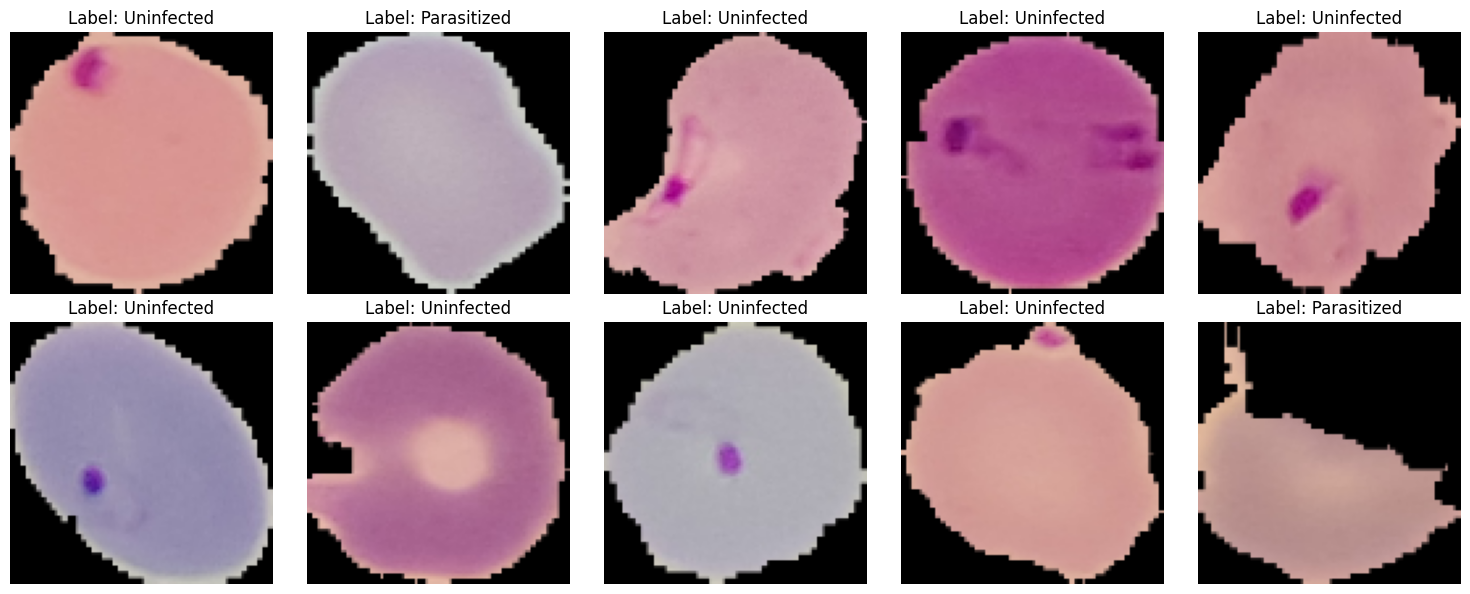

In [10]:
# Define the figure (2 rows with 5 images each) and axis objects
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes array
axs = axs.ravel()

# Load first 10 examples
for i, example in enumerate(malaria_dataset.take(10)):
    image = example["image"]
    label = example["label"]

    # Resize image for consistent display
    image = tf.image.resize(image, [100, 100])

    # Plot image and set title to the corresponding label
    axs[i].imshow(image.numpy().astype("uint8"))
    axs[i].title.set_text(f'Label: {"Parasitized" if label.numpy() else "Uninfected"}')
    # Hide axes for visual appeal
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
! pip install --upgrade jupyterlab
! jupyter nbextension list

     |████████████████████████████████| 11.6 MB 2.5 MB/s 
     |████████████████████████████████| 69 kB 11.7 MB/s 
     |████████████████████████████████| 133 kB 55.4 MB/s 
     |████████████████████████████████| 383 kB 52.2 MB/s 
     |████████████████████████████████| 435 kB 48.4 MB/s 
     |████████████████████████████████| 75 kB 7.3 MB/s 
     |████████████████████████████████| 85 kB 7.4 MB/s 
     |████████████████████████████████| 59 kB 11.0 MB/s 
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
     |████████████████████████████████| 117 kB 52.5 MB/s 
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
     |████████████████████████████████| 54 kB 4.9 MB/s 
     |████████████████████████████████| 85 kB 8.2 MB/s 
     |████████████████████████████████| 78 kB 11.0 MB/s 
     |████████████████████████████████| 912 kB 43.9 MB/s 
     |████████████████████████████████| 58 kB 8.8 MB/s 
     |████████████████████████████████| 105 kB 28.4 MB/s 
  Using cached argon2_cffi-23.1.0-

## Task 4: Preprocess the Images

In [11]:
# Take a single sample from the dataset
image = [example["image"] for example in malaria_dataset.take(1)][0]

In [12]:
# resize the image for consistent display
image_resized = tf.image.resize(image, (64, 64)).numpy()

In [13]:
# convert the resized image to grayscale
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

In [14]:
# Normalize the image to values between 0.0 and 1.0
image_normalized = image_gray / 255.0

In [15]:
# apply Gaussian blurring to the normalized image to remove random noise
image_blur = cv2.GaussianBlur(image_normalized, (5, 5), 0)

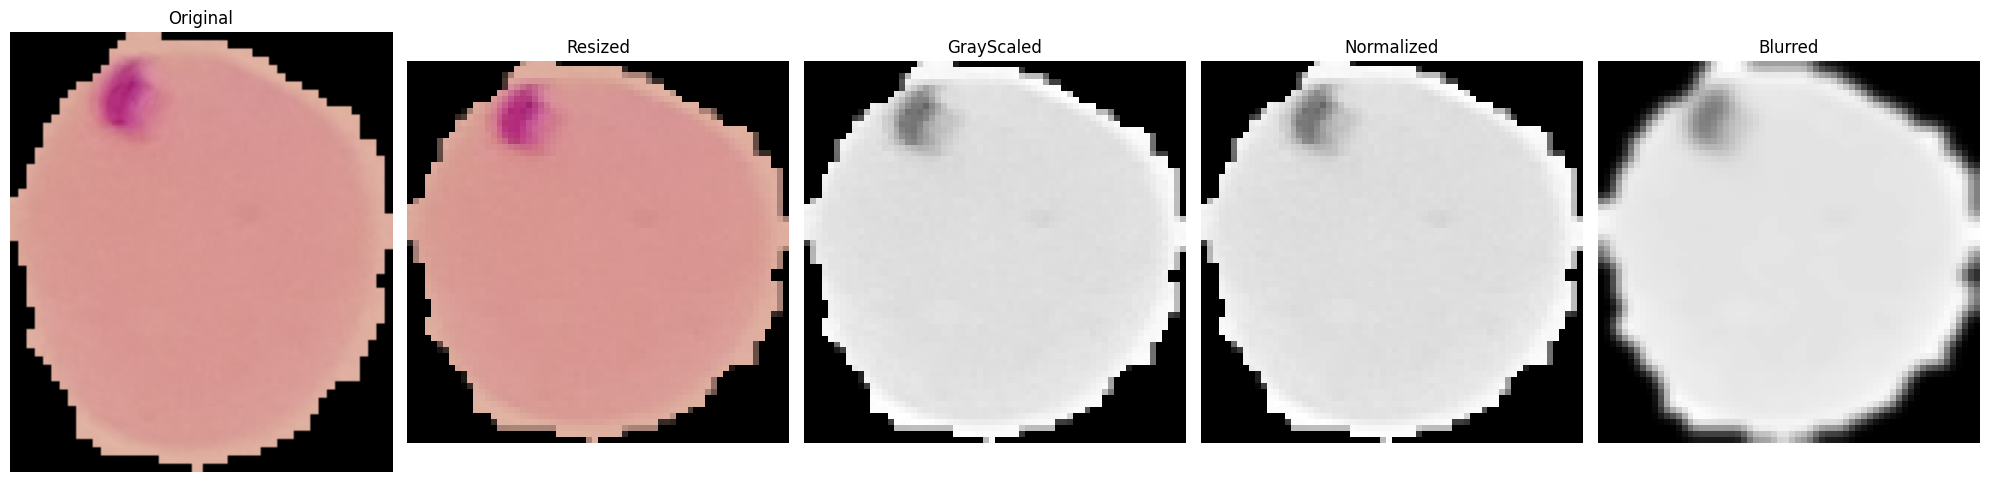

In [16]:
# Define the figure and axes
fig, axs = plt.subplots(1, 5, figsize=(20, 20))

# Set the titles of each image and store the images in an array
titles = ['Original', 'Resized', 'GrayScaled', 'Normalized', 'Blurred']

images = [image, image_resized.astype(int), image_gray, image_normalized, image_blur]

# Loop over the images and display them
for i, img in enumerate(images):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Task 5: Split the Data

In [17]:
# Shuffle the dataset
malaria_dataset = malaria_dataset.shuffle(buffer_size=10000)

In [18]:
# To reduce computation time we take the first 10% of the dataset.
# In a real-world scenario, you'd likely use the full dataset.
malaria_dataset = malaria_dataset.take(len(malaria_dataset) // 10)

In [19]:
TRAIN_SET_SIZE = 0.7 # Relative size of the training set
VAL_SET_SIZE = 0.15  # Relative size of the validation set
TEST_SIZE = 0.15     # Relative size of the test set

# Determine the size of the dataset
dataset_size = len(malaria_dataset)

# Define the sizes of the training, validation, and test set
train_size = int(TRAIN_SET_SIZE * dataset_size)
val_size = int(VAL_SET_SIZE * dataset_size)
test_size = int(TEST_SIZE * dataset_size)

In [20]:
# Take the first train_size samples for the training set
train_dataset = malaria_dataset.take(train_size)

# Skip the first train_size samples to get the data for validation and testing
val_test_dataset = malaria_dataset.skip(train_size)

# Finally, simply retrieve the data for the validation and test set
val_dataset = val_test_dataset.skip(val_size)
test_dataset = val_test_dataset.take(test_size)

In [21]:
def print_class_counts(dataset, dataset_name):
    count_positive = 0
    count_negative = 0
    for sample in dataset:
        if sample["label"] == 1:
            count_positive += 1
        else:
            count_negative += 1

    print(f'{dataset_name}:')
    print(f'Positive samples: {count_positive}, Proportion: {count_positive / (count_positive + count_negative):.2f}')
    print(f'Negative samples: {count_negative}, Proportion: {count_negative / (count_positive + count_negative):.2f}')
    print()

print_class_counts(train_dataset, 'Train Dataset')
print_class_counts(val_dataset, 'Validation Dataset')
print_class_counts(test_dataset, 'Test Dataset')

2024-05-15 11:00:59.256564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 9965 of 10000
2024-05-15 11:00:59.302198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


Train Dataset:
Positive samples: 963, Proportion: 0.50
Negative samples: 965, Proportion: 0.50

Validation Dataset:
Positive samples: 203, Proportion: 0.49
Negative samples: 211, Proportion: 0.51

Test Dataset:
Positive samples: 207, Proportion: 0.50
Negative samples: 206, Proportion: 0.50



## Task 6: Augment the Images

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Configure random transformations for image augmentation
data_gen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [24]:
# Take one sample image from your dataset
sample_image = next(iter(malaria_dataset))['image']
sample_image = tf.image.resize(sample_image, [64, 64])

# Expand dimensions to fit the generator's requirements
sample_image = np.expand_dims(sample_image, axis=0)

# Generate batches of augmented images from our original image
aug_iter = data_gen.flow(sample_image)


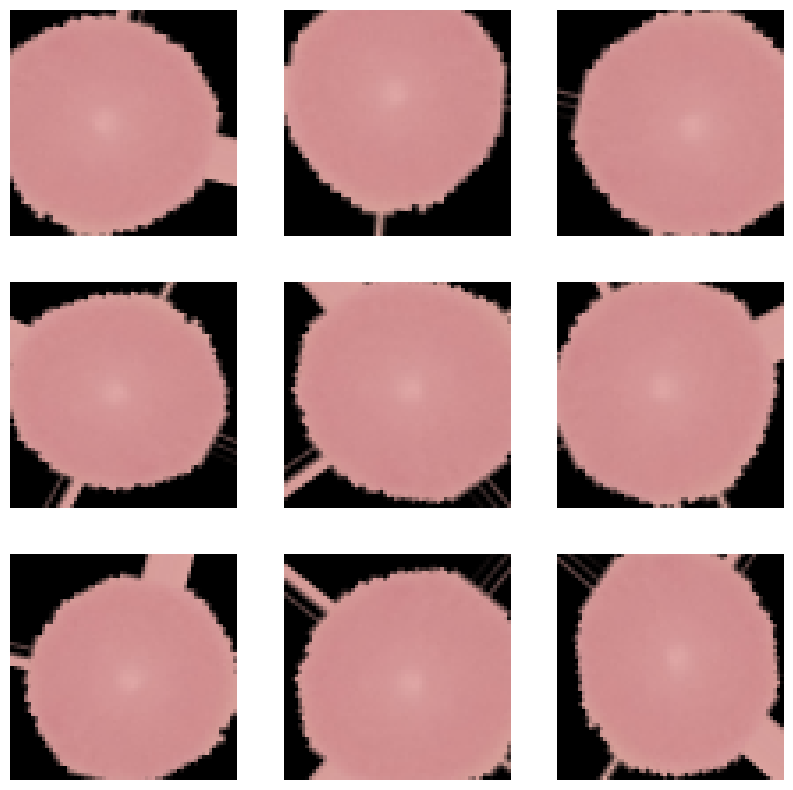

In [25]:
# Generate and plot nine different augmentations of the original image
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Generate and plot new images
for i, ax in enumerate(axs.flat):
    augmented_image = next(aug_iter)[0].astype('uint8')
    ax.imshow(augmented_image)
    ax.axis('off')

plt.show()

In [26]:
# Augmenting the training samples is significantly more sophisticated
# it applies various image augmentations to each sample
def augment_train_images(sample):
    image = sample["image"]
    label = sample["label"]

    image = tf.image.resize(image, IMG_SIZE) # Resize
    image = tf.image.random_flip_left_right(image) # Random horizontal flip
    image = tf.image.random_flip_up_down(image) # Random vertical flip
    image = tf.image.random_brightness(image, max_delta=0.1) # Random brightness
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2) # Random contrast
    image = tf.image.per_image_standardization(image) # Normalize each image

    return image, label

def augment_val_test_images(sample):
    image = sample["image"]
    label = sample["label"]

    image = tf.image.resize(image, IMG_SIZE) # Resize
    image = tf.image.per_image_standardization(image) # Normalize each image

    return image, label

In [27]:
# apply the function to the dataset
BATCH_SIZE = 32
IMG_SIZE = (64, 64)

augmented_train_dataset = malaria_dataset.map(augment_train_images).batch(BATCH_SIZE)
resized_val_dataset = val_dataset.map(augment_val_test_images).batch(BATCH_SIZE)
resized_test_dataset = test_dataset.map(augment_val_test_images).batch(BATCH_SIZE)

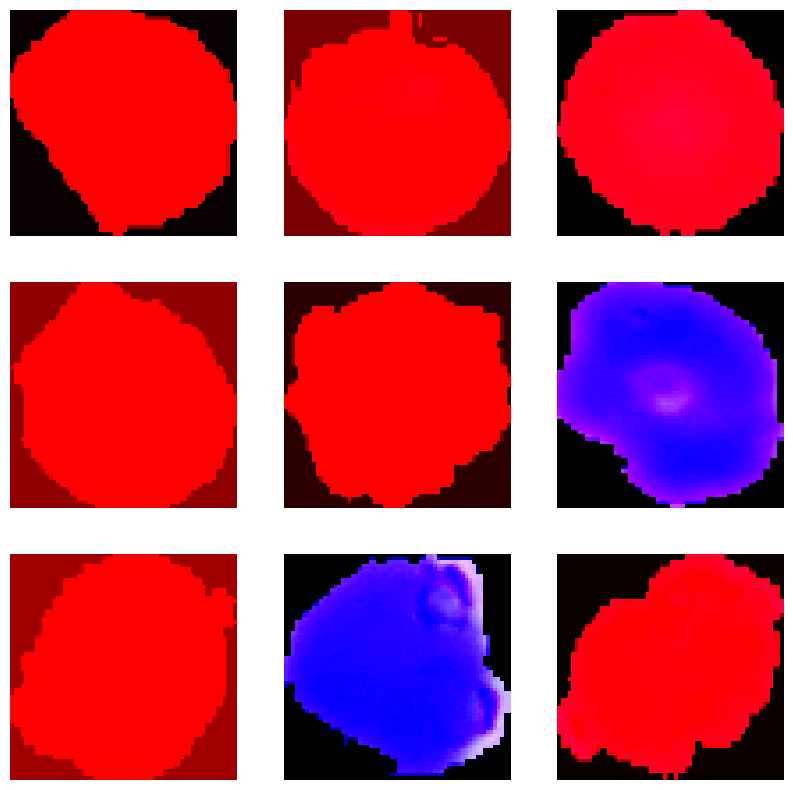

In [28]:
# Plot some augmented images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, (image_batch, label_batch) in enumerate(augmented_train_dataset.take(9)):
    # Get a batch of images
    image = image_batch[0]

    # Plot the first image in the batch
    axs[i // 3, i % 3].imshow(image)
    axs[i // 3, i % 3].axis('off')

plt.show()

# Building an Image Classifier with TensorFlow

## Task 7: Set Up a Neural Network

In [29]:
import tensorflow as tf
# tf.keras: This is TensorFlow’s high-level API 
# for model construction, training, evaluation, and inference.

# use layers to define the network
from tensorflow.keras import layers

In [30]:
# Renaming datasets
train_set = augmented_train_dataset
val_set = resized_val_dataset
test_set = resized_test_dataset

In [31]:
# get the model’s input shape and the number of classes
# Extract a single batch from the training dataset
for image_batch, label_batch in train_set.take(1):
    input_shape = image_batch[0].shape
    num_classes = len(tf.unique(label_batch).y)

print(f"Image shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Image shape: (64, 64, 3)
Number of classes: 2


## Task 8: Define the Model Architecture

CNN models and layers used
- Sequential: This model is a linear stack of layers that lets you easily add new layers to the CNN.
- Conv2D: This convolves the image and uses parameters like filters, filter size, activation function, and input shape.
- Activation functions: These introduce nonlinearity into the neural network.
- MaxPooling2D: This reduces spatial dimensions (width, height) by taking maximum values in a defined window.
- Flatten: This transitions from convolutional to Dense layers.
- Dense: This connects each input neuron to each output neuron in a dense (i.e., fully connected) manner. The last Dense layer often uses a softmax activation function for multi-class tasks or sigmoid﻿ for binary tasks.


ResNet blocks use convolutional and activation layers, and then add the stack’s output to the previous stack’s output. In addition, a GlobalAveragePooling2D layer is used before the final Dense layers to reduce spatial dimensions, parameter count, and potential overfitting.

In [32]:
# CNN in TensorFlow utilizing the tf.keras.Sequential() module and different layer
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [33]:
# visualize the model by applying the summary()
cnn_model.build(input_shape=(None, 64, 64, 3))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [34]:
# a simple ResNet in TensorFlow using the keras functional API
# Input layer
inputs = tf.keras.Input(shape=input_shape)

# First block
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

# Second block with a residual connection
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

# Third block with a residual connection
x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

# Final layers including the output layer
x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x) # Randomly drops half the connections during training for robustness

outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model = tf.keras.Model(inputs, outputs)

In [35]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 62, 62, 32)           896       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 60, 60, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 64)           0         ['conv2d_4[0][0]']            
 g2D)                                                                                         

## Task 9: Prepare the Model for Training

A loss function evaluates algorithm accuracy.
- Binary cross-entropy: It’s suitable for exclusive class data such as parasitized vs. uninfected.
- Squared loss: It measures the squared difference between predictions and actual results

Optimizers adjust model attributes, such as weights, to reduce loss.
Evaluation metrics are there to gauge model performance.

In [36]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0)

In [37]:
# Adam optimizer set 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
legacy_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [38]:
# set the metrics as a list of tf.keras.metrics classes
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

In [39]:
# compile the simple CNN and ResNet models
cnn_model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)
resnet_model.compile(optimizer=legacy_optimizer, loss=loss_fn, metrics=metrics)

## Task 10: Train and Monitor the Net

- epochs, i.e., the number of complete cycles through the training dataset. 
- callbacks, which can be viewed as utilities called at certain points during model training
    EarlyStopping: It stops training when the model’s performance ceases to improve.
    ReduceLROnPlateau: It decreases the learning rate when a metric stops improving.
    LearningRateScheduler: It alters the learning rate dynamically during training.
    ModelCheckpoint: It saves the model after each epoch, which is useful for resuming or choosing the best model.
- TensorBoard is used. It provides visual insights during training
    Metrics visualization (loss, accuracy)
    Model graph visualization
    Histograms of model parameters

In [40]:
EPOCHS = 2

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

def scheduler(epoch, lr):
    if epoch < 2:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [41]:
# define the TensorBoard callback and run the magic functions
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

# visualize logs
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
# training
cnn_history = cnn_model.fit(
    train_set,
    validation_data=val_set,
    epochs=EPOCHS,  
    callbacks=[early_stopping_callback, lr_scheduler, tensorboard_callback]
)

In [ ]:
resnet_history = resnet_model.fit(
    train_set,
    validation_data=val_set,
    epochs=EPOCHS,  
    callbacks=[early_stopping_callback, lr_scheduler, tensorboard_callback]
)

## Task 11: Evaluate the Performance

- Receiver operating characteristic (ROC) curve, which is a plot that illustrates the true positive rate against the false positive rate at various threshold settings. 
- Area under the curve (AUC) of the ROC curve, which in turn is used as a measure of the performance of the classification model

In [ ]:
# evaluate the model on the test data using the evaluate()
test_loss, test_acc, test_precision, test_recall, test_auc = resnet_model.evaluate(test_set)
print("test loss, test accuracy, test precision, test recall, test auc:", test_loss, test_acc, test_precision, test_recall, test_auc)

In [ ]:
# compute and plot the confusion matrix
import seaborn as sns

# Predict the values from the test set
y_pred = resnet_model.predict(test_set)

# Convert predicted classes to one-hot vectors 
y_pred_classes = np.concatenate(y_pred >= 0.5).astype(int)

# Convert validation observations to one-hot vectors
y_true = np.concatenate([labels for img, labels in test_set])

# Compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")

In [ ]:
# compute precision, recall, and F1 score by utilizing TensorFlow’s classification
# report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

In [ ]:
# visualize ROC and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.figure()

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# compare training and validation performance by first plotting the loss and accuracy development during the model training
# Retrieve history of loss and accuracy during training
hist = resnet_history.history

# Plot training vs. validation loss
plt.figure()
plt.plot(hist['loss'], label='Training Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot training vs. validation accuracy
plt.figure()
plt.plot(hist['accuracy'], label='Training Accuracy')
plt.plot(hist['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [ ]:
# compare the test accuracy and loss to those of the training and validation sets
# Compare test set performance to training and validation set
print(f"Training Accuracy: {np.round(np.max(hist['accuracy']), 3)}")
print(f"Validation Accuracy: {np.round(np.max(hist['val_accuracy']), 3)}")
print(f"Test Accuracy: {np.round(test_acc, 3)}")

print()

print(f"Training Loss: {np.round(np.min(hist['loss']), 3)}")
print(f"Validation Loss: {np.round(np.min(hist['val_accuracy']), 3)}")
print(f"Test Loss: {np.round(test_loss, 3)}")

print()

print(f"Training Precision: {np.round(np.min(hist['precision']), 3)}")
print(f"Validation Precision: {np.round(np.min(hist['val_precision']), 3)}")
print(f"Test Precision: {np.round(test_precision, 3)}")

print()

print(f"Training Recall: {np.round(np.min(hist['recall']), 3)}")
print(f"Validation Recall: {np.round(np.min(hist['val_recall']), 3)}")
print(f"Test Recall: {np.round(test_recall, 3)}")

print()

print(f"Training AUC: {np.round(np.min(hist['auc']), 3)}")
print(f"Validation AUC: {np.round(np.min(hist['val_auc']), 3)}")
print(f"Test AUC: {np.round(test_auc, 3)}")

In [ ]:
# visualize some misclassified examples
# Get misclassified indices
misclassified_idx = np.where(y_pred_classes != y_true)[0]

# Sample misclassified images
sample_idx = np.random.choice(misclassified_idx, size=10, replace=False)

test_list = []
for batch_img, batch_labels in test_set.as_numpy_iterator():
    for img, label in zip(batch_img, batch_labels):
        test_list.append((img, label))

# Plot misclassified samples
plt.figure(figsize=(15, 15))

for i, idx in enumerate(sample_idx):
    plt.subplot(5, 2, i+1)

    img, _ = test_list[idx]
    label = y_true[idx]
    
    plt.imshow(np.squeeze(img))
    plt.title(f"True label: {label} \n Predicted label: {y_pred_classes[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Building an Image Classifier with PyTorch

## Task 12: Set Up a Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


In [ ]:
# Set up the device
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

In [ ]:
# check the memory allocation of the device
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

In [ ]:
# Transform the TensorFlow dataset to a PyTorch-compatible dataset
class NumpyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)

In [ ]:
# the TensorFlow dataset to numpy arrays
numpy_train_data = np.concatenate([data for data, _ in train_set.as_numpy_iterator()])
numpy_train_labels = np.concatenate([labels for _, labels in train_set.as_numpy_iterator()])

numpy_val_data = np.concatenate([data for data, _ in val_set.as_numpy_iterator()])
numpy_val_labels = np.concatenate([labels for _, labels in val_set.as_numpy_iterator()])

numpy_test_data = np.concatenate([data for data, _ in test_set.as_numpy_iterator()])
numpy_test_labels = np.concatenate([labels for _, labels in test_set.as_numpy_iterator()])

In [ ]:
# PyTorch DataLoader from the PyTorch dataset
train_dataloader = DataLoader(NumpyDataset(numpy_train_data, numpy_train_labels), batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(NumpyDataset(numpy_val_data, numpy_val_labels), batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(NumpyDataset(numpy_test_data, numpy_test_labels), batch_size=BATCH_SIZE, shuffle=True)

## Task 13: Define the Model Architecture

CNN that contains the following modules and layers before heading over to a more complex one like ResNets
- nn.Module: It’s a base class that all PyTorch neural networks should inherit. Its __init__() method initializes the layers of the network, while the forward method defines the forward pass.
- Conv2D: It convolves the image using parameters like filters, filter size, activation function, and input shape.
- MaxPool2D: It reduces spatial dimensions (width, height) by taking maximum values in a defined window.
- Linear: It connects each input neuron to each output neuron in a dense (i.e., fully connected) manner.
- relu: It’s the activation function that introduces nonlinearity into the neural network.

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        # Apply convolution -> ReLU -> pooling operations
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor
        x = x.reshape(-1, 64 * 16 * 16)
        # Apply fully connected layer -> ReLU
        x = F.relu(self.fc1(x))
        # Final output layer
        x = self.fc2(x)
        return torch.sigmoid(x)

# Initialize the model
simple_model = SimpleCNN()
# Move the model to the device
simple_model = simple_model.to(device)

In [ ]:
# visualize the model with the summary() function provided by the torchsummary library
from torchsummary import summary
summary(simple_model, (3, 64, 64))

In [ ]:
# create a ResNet in PyTorch using two separate classes and nn.Module

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.linear = nn.Linear(256, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return torch.sigmoid(out)

# Initialize the model
resnet_model = ResNet(ResidualBlock, [2, 2, 2])
# Move the model to the device
resnet_model = resnet_model.to(device)

# visualize the model
summary(resnet_model, (3, 64, 64))

## Task 14: Prepare the Model for Training

In [ ]:
# set the learning rate to a low value and define the loss function
learning_rate = 0.001
loss_fn = torch.nn.BCELoss()

In [ ]:
# Adam optimizer set
simple_optimizer = torch.optim.Adam(simple_model.parameters(), lr=learning_rate)
resnet_optimizer = torch.optim.Adam(resnet_model.parameters(), lr=learning_rate)

In [ ]:
# set the learning rate scheduler by assigning the optimizer and the mode
simple_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(simple_optimizer, 'min')
resnet_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(resnet_optimizer, 'min')

## Task 15: Train and Monitor the Net

In [ ]:
# define the save_checkpoint function as an additional callback
def save_checkpoint(epoch, model, optimizer, loss, save_path):
    # Save model checkpoint if conditions are met.
    model.eval()
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
        },
        save_path
    )

In [ ]:
# set the number of epochs and define the dataloaders and dataset_sizes dictionaries
EPOCHS = 2

dataloaders = {
    "train": train_dataloader,
    "val": val_dataloader
}

dataset_sizes = {
    "train": sum(len(i[0]) for i in train_dataloader),
    "val":sum(len(i[0]) for i in val_dataloader)
}

In [ ]:
# define the training function
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs}')

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs.permute(0, 3, 1, 2))
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs.reshape(-1), labels.float())

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step(loss)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        save_checkpoint(epoch, model, optimizer, loss, f'./model_checkpoint_epoch_{epoch}.pth')

In [ ]:
# run the training pipeline for each model
train_model(simple_model, loss_fn, simple_optimizer, simple_scheduler, EPOCHS)

In [ ]:
train_model(resnet_model, loss_fn, resnet_optimizer, resnet_scheduler, EPOCHS)

## Task 16: Evaluate the Performance

In [ ]:
#  evaluate the best model on the test data using the evaluate() method
# Load the best model weights
resnet_model.load_state_dict(torch.load(f'./model_checkpoint_epoch_{EPOCHS-1}.pth')["model_state_dict"])

# Switch the model to evaluation mode
resnet_model.eval()

In [ ]:
# Initialize the test loss and correct predictions counter
test_loss = 0.0
correct = 0

# Get all predictions in a list
all_preds = []
all_targets = []

# Don’t compute gradients for performance
with torch.no_grad():
    # Loop over test data
    for data, target in test_dataloader:
        # Move data and target to the correct device
        data, target = data.to(device), target.to(device)
        # Forward pass
        outputs = resnet_model(data.permute(0, 3, 1, 2))
        # Compute the loss
        _, preds = torch.max(outputs, 1)
        loss = torch.nn.BCELoss()(outputs.reshape(-1), target.float())
        # Update the test loss 
        test_loss += loss.item()*data.size(0)
        # Compare predictions to true label
        correct += torch.sum(preds == target.data)

        # Save all predictions and target values
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Calculate average loss
test_loss = test_loss/len(test_dataloader.dataset)

print('Test Loss: {:.6f}\n'.format(test_loss))

# Calculate accuracy
accuracy = correct.double() / len(test_dataloader.dataset)

print('\nTest Accuracy: {:.6f} ({}/{})'.format(accuracy, correct, len(test_dataloader.dataset)))

In [ ]:
# compute and plot the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d")


In [ ]:
# compute the precision, recall, and F1 score by utilizing TensorFlow’s classification_report
from sklearn.metrics import classification_report
print(classification_report(all_targets, all_preds))

# Fine-Tuning and Transfer Learning

## Task 17: Fine-Tune Pre-Trained TensorFlow Model

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
- Feature extractor
- Fine-tuning


In [ ]:
# define a pretrained model in TensorFlow
# Load the MobileNetV2 model but exclude the classification layers
pre_trained_tf_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)

In [ ]:
# freeze the model weights and set the trainable parameter of the model to False
pre_trained_tf_model.trainable = False

In [ ]:
# add a global average pooling layer to reduce the dimensionality of the input and two Dense layers to produce the final output
# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(pre_trained_tf_model.output)

# Add two Dense layers for classification for the final prediction
x = tf.keras.layers.Dense(32, activation='relu')(x)
tf_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# create the final model
# Combine the pretrained model with the new output layer
tf_model = tf.keras.Model(inputs=pre_trained_tf_model.input, outputs=tf_output)

In [ ]:
# Compile and fit
tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0),
    metrics=['accuracy']
)

history = tf_model.fit(
    train_set,
    epochs=10,
    validation_data=val_set
)

In [ ]:
# the model over the test set to get the predictions and determine its performance using classfication_report()
from sklearn.metrics import classification_report

# Predict the values from the test set
y_pred = tf_model.predict(test_set)

# Convert prediction classes to one-hot vectors 
y_pred_classes = np.concatenate(y_pred >= 0.5).astype(int)

# Convert validation observations to one-hot vectors
y_true = np.concatenate([label for imgs, label in test_set])

print(classification_report(y_pred_classes, y_true))

## Task 18: Fine-Tune Pre-Trained PyTorch Model

In [ ]:
# Just like in TensorFlow, PyTorch also provides a host of 
# pretrained models in its torchvision.models module, including
#  mobilenet_v2


# mport the torchvision.models library and define the mobilenet_v2
#  with its pretrained weights
import torchvision.models

# Load the pretrained MobileNetV2 model
pre_trained_pt_model = torchvision.models.mobilenet_v2(pretrained=True)

In [ ]:
# loop over the model parameters and freeze each layer on its own except for the last two, which you need to keep adjustable for fine-tuning
for param in list(pre_trained_pt_model.parameters())[:-2]:
    param.requires_grad = False

In [ ]:
# replace the last layer by inserting a new nn.Linear() layer with one output neuron
# Replace the classifier part of the pretrained model
pre_trained_pt_model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(pre_trained_pt_model.last_channel, 1),
    nn.Sigmoid()
)

In [ ]:
# compile the final model by defining a loss function, an optimizer, and a learning rate scheduler, and run the training pipeline
# Define the loss function, the optimizer, and the learning rate scheduler
pt_loss_fn = torch.nn.BCELoss()
pt_optimizer = torch.optim.Adam(pre_trained_pt_model.parameters(), lr=0.001)
pt_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(pt_optimizer, 'min')

EPOCHS = 10

# Train the model
train_model(pre_trained_pt_model, pt_loss_fn, pt_optimizer, pt_scheduler, EPOCHS)

In [ ]:
# evaluate the model by first loading it from the last epoch
# Load the best model weights
pre_trained_pt_model.load_state_dict(torch.load('./model_checkpoint_epoch_9.pth')["model_state_dict"])

# Switch the model to evaluation mode
pre_trained_pt_model.eval()

In [ ]:
# inference pipeline 
# Initialize the test loss and correct predictions counter
test_loss = 0.0
correct = 0

# Get all predictions in a list
all_preds = []
all_targets = []

# Don’t compute gradients for performance
with torch.no_grad():
    # Loop over test data
    for data, target in test_dataloader:
        # Move data and target to the correct device
        data, target = data.to(device), target.to(device)
        # Forward pass
        outputs = pre_trained_pt_model(data.permute(0, 3, 1, 2))
        # Compute the loss
        _, preds = torch.max(outputs, 1)
        loss = torch.nn.BCELoss()(outputs.reshape(-1), target.float())
        # Update the test loss 
        test_loss += loss.item()*data.size(0)
        # Compare predictions to true label
        correct += torch.sum(preds == target.data)

        # Save all predictions and target values
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Calculate average loss
test_loss = test_loss/len(test_dataloader.dataset)

print('Test Loss: {:.6f}\n'.format(test_loss))

# Calculate accuracy
accuracy = correct.double() / len(test_dataloader.dataset)

print('\nTest Accuracy: {:.6f} ({}/{})'.format(accuracy, correct, len(test_dataloader.dataset)))


In [ ]:
# execute the classification report to determine the test performance of the model
print(classification_report(all_preds, all_targets))
